### **IMPORTING PACKAGES**

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

### **LOADING THE DATASET**

In [56]:
df=pd.read_csv("congress_tweets.csv",encoding='ISO-8859-1')
df

,Unnamed: 0,tweet,target
0,0,spending shocker cbo latest debt projection sh...,0
1,1,will you vote for congress in 2024 congress co...,1
2,2,triviapotus we need termlimits for congress,1
3,3,eam s jaishankar hit out at congress for quad ...,0
4,4,is this why congress supported amp celebrated ...,1
...,...,...,...
30247,14256,quizzicalguy in this loksabhaelections2019 is ...,1
30248,14257,anumavidisha rahulgandhi arvindkejriwal when s...,0
30249,14258,sherryontopp early morning political move afte...,0
30250,14259,mayankgandhi04 early morning political move af...,0


### **PRE-PROCESSING OF DATA**

In [57]:
cols=['Unnamed: 0']
df.drop(cols,axis=1,inplace=True)

In [58]:
df.shape


(30252, 2)

In [59]:
print(df.isnull().sum())

tweet     0
target    0
dtype: int64


In [60]:
print(df.head())


                                               tweet  target
0  spending shocker cbo latest debt projection sh...       0
1  will you vote for congress in 2024 congress co...       1
2        triviapotus we need termlimits for congress       1
3  eam s jaishankar hit out at congress for quad ...       0
4  is this why congress supported amp celebrated ...       1


In [61]:
print(df.target.value_counts())

1    16012
0    14240
Name: target, dtype: int64


In [62]:
mapping={0:'Negative',1:'Positive'}
df['target']=df['target'].map(mapping)

In [63]:
print(df.head())

                                               tweet    target
0  spending shocker cbo latest debt projection sh...  Negative
1  will you vote for congress in 2024 congress co...  Positive
2        triviapotus we need termlimits for congress  Positive
3  eam s jaishankar hit out at congress for quad ...  Negative
4  is this why congress supported amp celebrated ...  Positive


In [64]:
print(df.iloc[0])
print(df.iloc[1])


tweet     spending shocker cbo latest debt projection sh...
target                                             Negative
Name: 0, dtype: object
tweet     will you vote for congress in 2024 congress co...
target                                             Positive
Name: 1, dtype: object


### **SPLITTING THE DATA**

In [65]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, train_size=0.80, random_state=42)

In [67]:
print(X)

                                                   tweet
0      spending shocker cbo latest debt projection sh...
1      will you vote for congress in 2024 congress co...
2            triviapotus we need termlimits for congress
3      eam s jaishankar hit out at congress for quad ...
4      is this why congress supported amp celebrated ...
...                                                  ...
30247  quizzicalguy in this loksabhaelections2019 is ...
30248  anumavidisha rahulgandhi arvindkejriwal when s...
30249  sherryontopp early morning political move afte...
30250  mayankgandhi04 early morning political move af...
30251  drkumarvishwas early morning political move af...

[30252 rows x 1 columns]


## **USING NAIVE BAYES CLASSIFIER**

In [68]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features1 = vectorizer.fit_transform(X_train.tweet)

In [70]:
dfv1 = pd.DataFrame(
    data=features1.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=X_train.tweet,
)
dfv1

,000,005862,01,02,0301409508,04,05042019,0530,09,0ffice0ffrg,...,zzz,ªà,²à,³ã,µà,¹à,¼ã,à²,à²¹,à³
tweet,,,,,,,,,,,,,,,,,,,,,
rahulgandhi this narendramodi should not be there in our parliament for the power and position he can do or utter any thing wishing all the,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jhasanjay nonindian gandhi india vs corrupt free india phirekbaarmodisarkar rahul gandhipagalhai,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
senior journalist sharanpoovanna breaks down the emerging trends in the upcoming karnatakaelections on swell swellcast theprint karnatakaelection2023 karnataka kannada kannadiga congress bjp newsupdate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jhasanjay gandhi and nehru divided our country precisely nehru wnated to become what may decided to partition akhand bharat bharat suffering since we will teach a lesson to gandhi family in this election zamke dalo vote bjp ko loksabhaelections2019,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rahulgandhi excuse me but they come to see a comedy show free of cost the crowds gathering for ur rallies do not mean they support u and ur maha thugbandhan loksabhaelections2019 phirekbaarmodisarkar jai hind jai maharashtra,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
timesofindia narendramodi rahulgandhi yadavakhilesh rahulgandhi has nothing to lose in 2019 lok sabha elections hence all his strokes are turning to be master strokes he can play another master stroke if he decides to stand opposite narendramodi in elections wherever pm decides to file nomination varanasi vadodara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
whether crime case congress wit tamper ultim violat ethic could expect less schiff excel cheat ethic investig now,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
virsanghvi oh i forgot that virsanghvi and niraradia always hv the inside track on or was it during the congress,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(features1, y_train)

MultinomialNB()

In [72]:
prediction = classifier.predict(vectorizer.transform(X_test.tweet))

pd.DataFrame({'TWEET':X_test.tweet,'Favour':y_test, 'prediction':prediction})

,TWEET,Favour,prediction
16810,shame on you incindia and rahulgandhi for seri...,Negative,Negative
19671,loksabhaelections2019 vijayanpinarayi reacts t...,Negative,Negative
23119,since u say why not check out the story of evm...,Negative,Negative
17992,pokershash rahulgandhi see the way he talks be...,Negative,Negative
1588,deepakseditor one thing is sure supremecourtof...,Positive,Negative
...,...,...,...
11275,swwagatam jewelkapur harsubh sunitag jagannkau...,Positive,Positive
15891,opinion ec formid reput maintain lose gopalkri...,Negative,Positive
3502,invas southern border presid declar nation eme...,Negative,Positive
5514,goa congress question bjpled coalit govern s d...,Positive,Positive


In [73]:
from sklearn.metrics import accuracy_score
print("The Performance score of this Naive Bayes algorithmic model is : ",accuracy_score(y_test,prediction)*100,"%")

#Enhancement is that using support vector machine the accuracy score was about 82% approximately
print("The Performance score of this Support Vector Machine algorithmic model is : 82 % ")

The Performance score of this Naive Bayes algorithmic model is :  72.45083457279789 %
The Performance score of this Support Vector Machine algorithmic model is : 82 % 


In [74]:
tot=df.target.value_counts().sum()
print("Total Tweets made by public: ",tot)
df.target.value_counts()
posi_inc = df.target.value_counts()[0]
print("Positive tweets made on INC in percentage: ",(posi_inc/tot)*100,"%")
nega_inc = df.target.value_counts()[1]
print("Positive tweets made on INC in percentage: ",(nega_inc/tot)*100,"%")

Total Tweets made by public:  30252
Positive tweets made on INC in percentage:  52.92873198466217 %
Positive tweets made on INC in percentage:  47.07126801533783 %


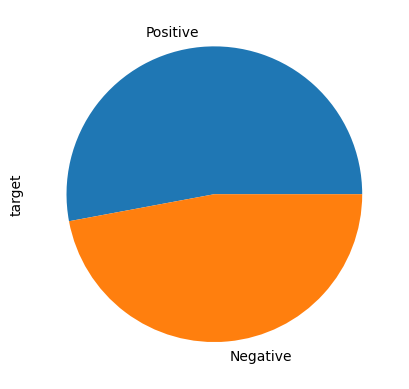

In [75]:
df.target.value_counts(normalize=True).plot.pie()
plt.show()

### **PICKLE FILE**

In [76]:
import pickle
pickle.dump(classifier,open('senti.pkl','wb'))

In [77]:
pickled_model = pickle.load(open('senti.pkl', 'rb'))

### **GRADIO UI**

In [78]:
!pip install gradio

In [79]:
import gradio as gr

###The below User interface needs to be activated by running the whole model once again or using the pickle file namely senti.pkl as in this case mentioned.

How to run the model- By uploading the dataset in the file upload section and running each cell in the ipynb file.

In [80]:
#Creating a User-defined function
def make_prediction(text):
   pickled_model = pickle.load(open('senti.pkl', 'rb'))
   pred=pickled_model.predict(vectorizer.transform([text]))
   if pred == "Positive":
    return "A positive statement as been detected"
   else:
    return "Alert! a negative statement as been detected"

#Creating inputs
text_input = gr.Textbox(label="Enter the Statement")

#Creating output
text_output = gr.Textbox(label="Positive or Negative statement w.r.t Indian National Congress")

#Interfacing the user defined function with Gradio
app = gr.Interface(fn=make_prediction , inputs= text_input, outputs = text_output)
app.launch(share=True, debug=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9d82450f526b6f48da.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
#The above User interface needs to be activated by running the whole model once again